In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
from sklearn.ensemble import BaggingClassifier
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
x = df.drop(columns = ["quality"])
y = df.quality

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# building bag classifier with base estimator as decision tree

In [5]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 10 )

In [6]:
bag_dt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [7]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 7, 5, 5, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 7, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 7, 6, 5, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 6,
       6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6,
       7, 6, 7, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 7, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,

In [8]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [9]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [10]:
bag_dt.estimator_params # no parameters defined for base estimator

()

# building bag classifier with base estimator as KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators= 10) 
# value of k = 6 aise hi select kar diye hai....it may not be the best possible

In [13]:
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [14]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 4, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5,
       5, 7, 7, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       5, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 7, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6,

In [15]:
# note: random forest is an algo that follows bagging by default... 
#it doesn't mean that we can not use any other base estimator in bagging classifier or regressor

# building bag classifier with base estimator as Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
rf.score(x_test, y_test)

0.695

In [20]:
bag_dt.score(x_test, y_test)

0.655

In [21]:
bag_knn.score(x_test, y_test)

0.495

#### so simply by looking into these above score results, we can't evaluate which model is going to give the best accuracy

#### as it may be possible to increase accuracy of a particular model by using the best parameters

#### therefore the conclusion is that no algo is the best,,,,it all depends on the nature of the dataset and the parameters we select to build a model

#### As much as n_estimators are defined, we can also see each and every estimators even in the case of random forest, however it is hard to interpret , but not impossible.

In [22]:
rf = RandomForestClassifier(n_estimators=5)

In [23]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [24]:
rf.score(x_test, y_test)

0.6175

In [25]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=313648320),
 DecisionTreeClassifier(max_features='auto', random_state=216360173),
 DecisionTreeClassifier(max_features='auto', random_state=1061383173),
 DecisionTreeClassifier(max_features='auto', random_state=807991425),
 DecisionTreeClassifier(max_features='auto', random_state=880591608)]

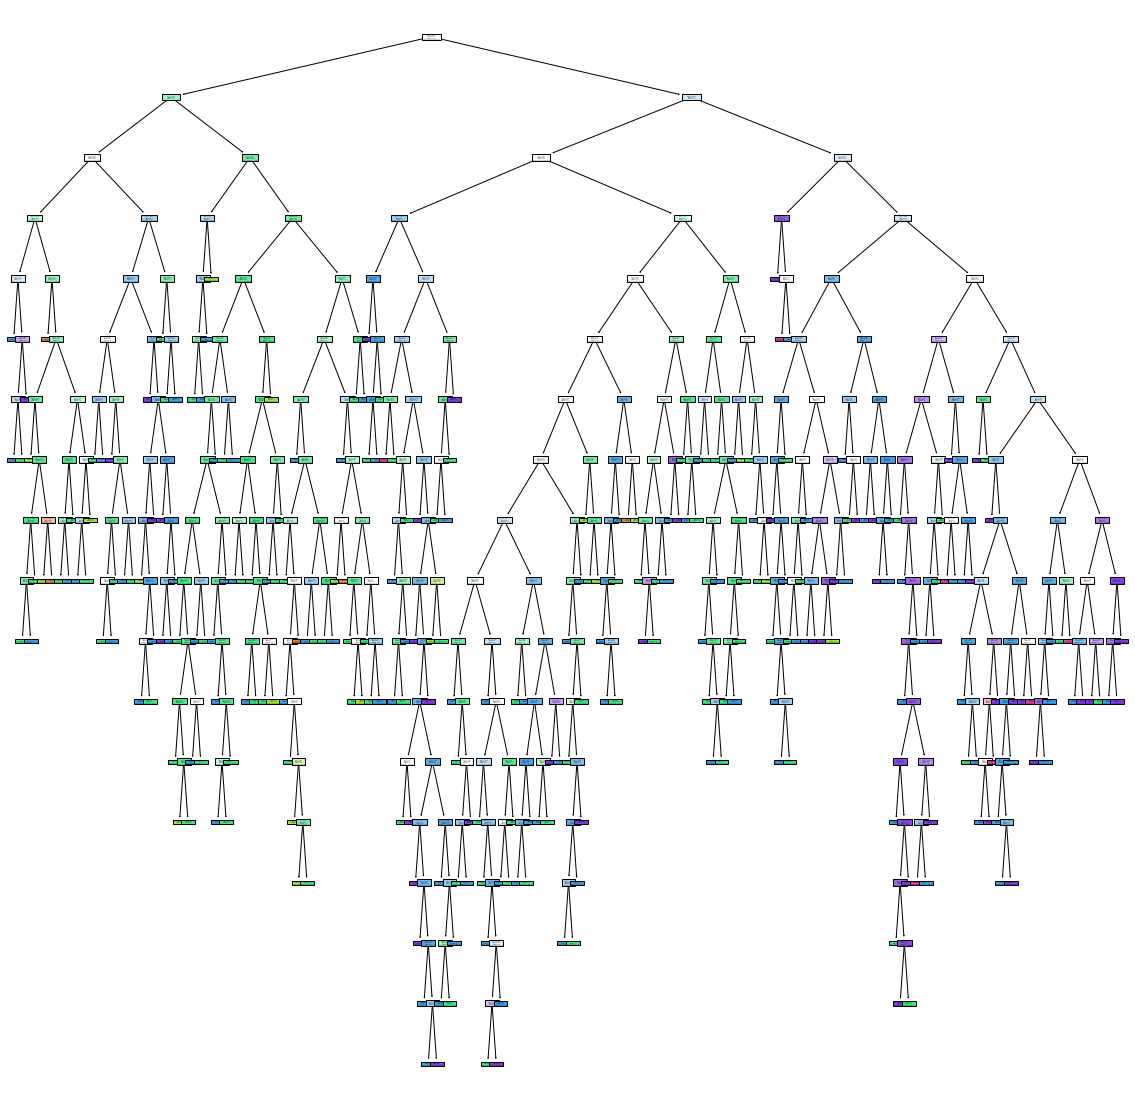

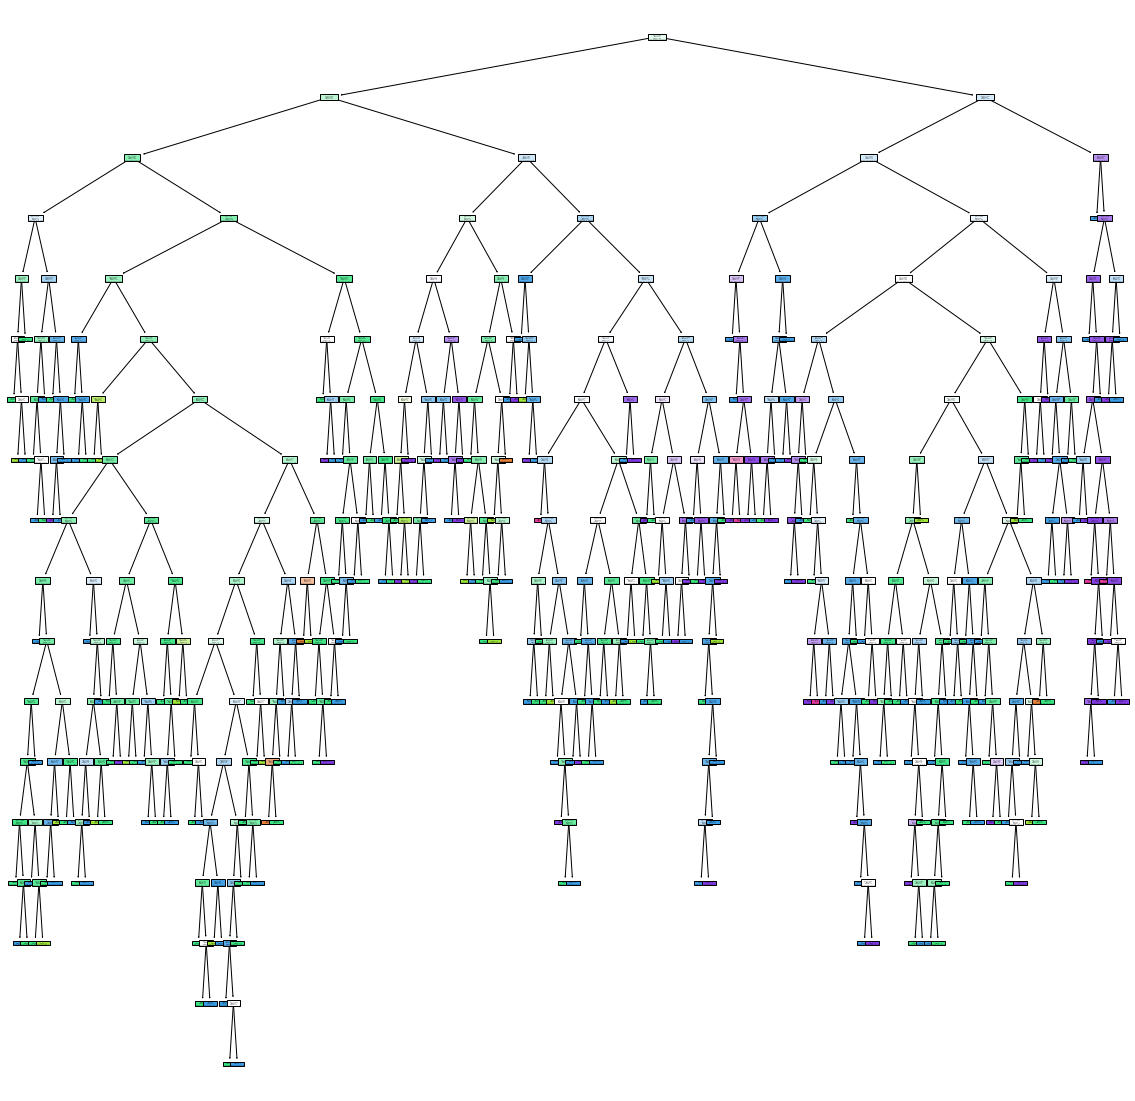

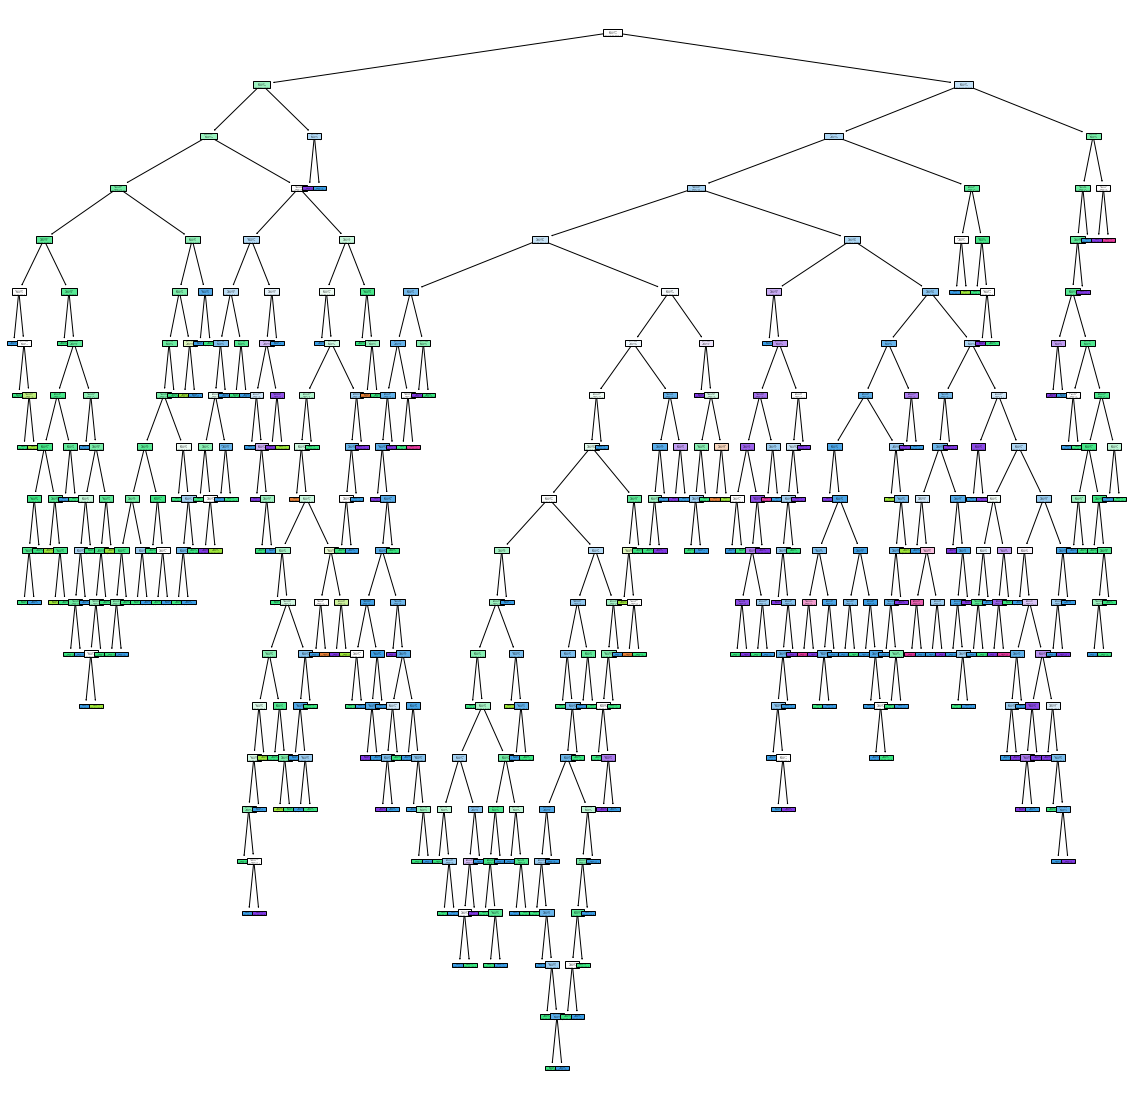

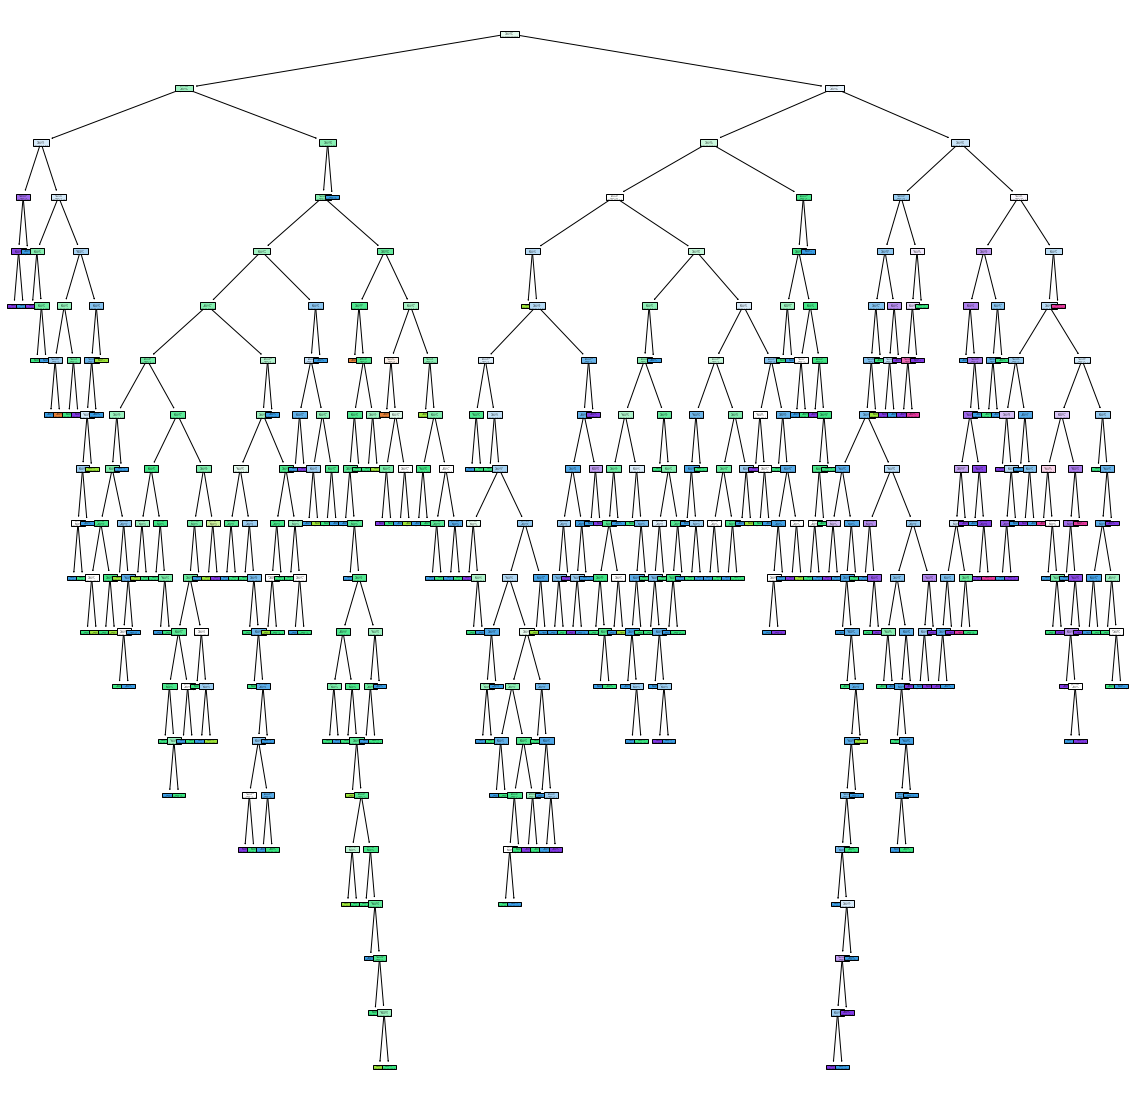

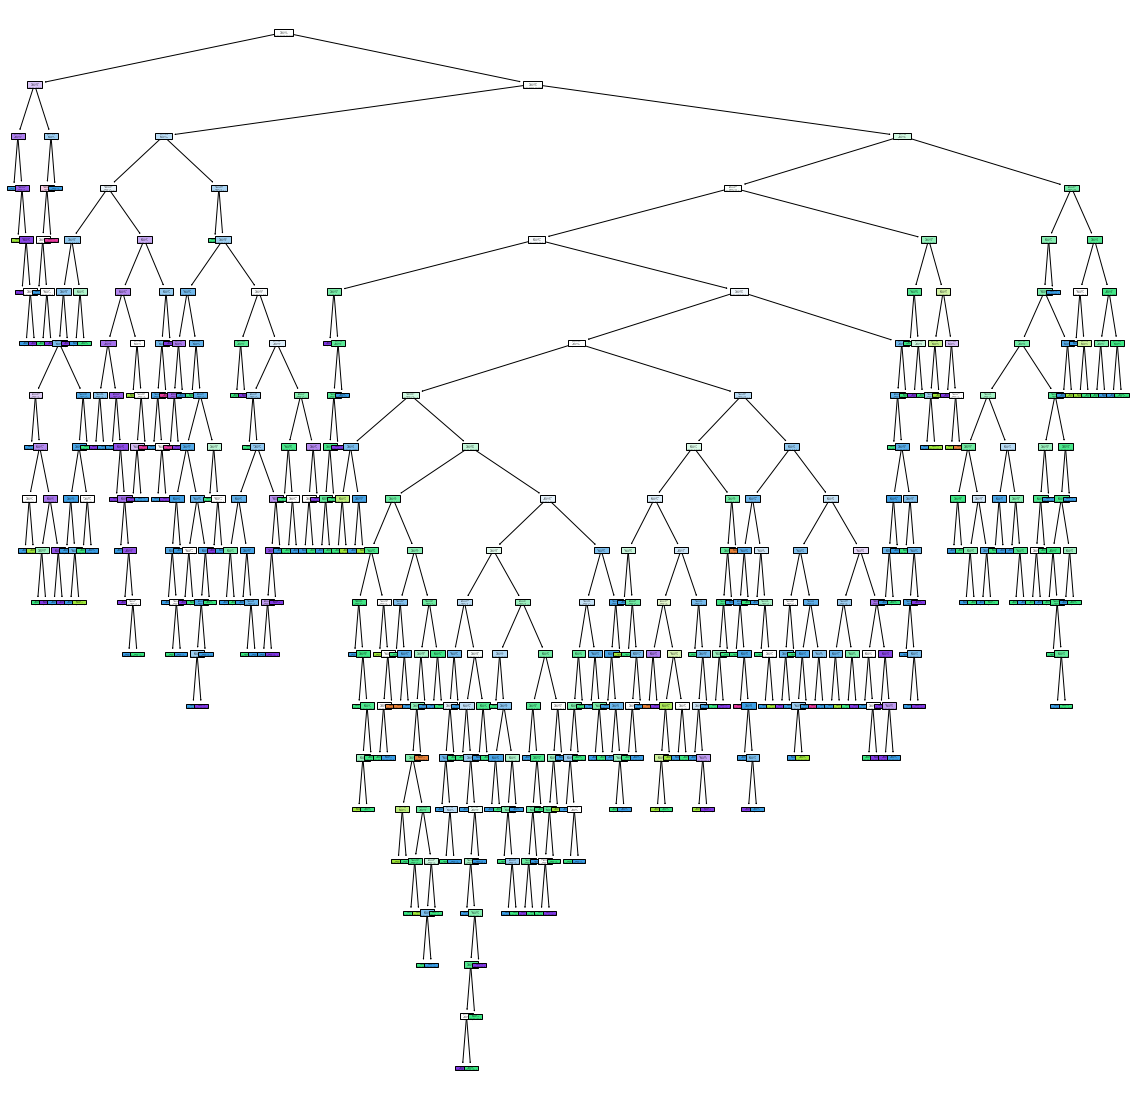

In [26]:
for i in rf.estimators_:
    plt.figure(figsize = (20,20))
    tree.plot_tree(i, filled = True)

#### Let us now try to find out the best possible parameters for the random forest 

In [32]:
grid_params = {
    
    "n_estimators": [5,10,50,100,120,150],
    "criterion": ["gini", "entropy"],
    "max_depth": range(1,10),
    "min_samples_leaf": range(2,10)
}

In [33]:
rf = RandomForestClassifier(n_estimators=5)

In [36]:
grid_search_rf = GridSearchCV(param_grid=grid_params,cv = 10,n_jobs=6, verbose=1, estimator = rf )

In [ ]:
grid_search_rf.fit(x_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


C:\Users\Utkarsh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


### verbose = 1 means stream logging and Verbose = 0 turns it off

In [ ]:
grid_search_rf.best_params_

In [ ]:
rf_new = RandomForestClassifier(criterion = "entropy", n_estimators = 120, max_depth = 9, min_samples_leaf = 1)

In [ ]:
rf_new.fit(x_train, y_train)

In [ ]:
rf_new.score(x_test, y_test)

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf_new.estimators_[4], filled = True)

#### Hyperparameter tuning helps in stabilising a model, not sure to increase accuracy of the model